### Merging 12 months of sales data into CSV file manually 

In [21]:
%%capture
import pandas as pd
import os 

pd.read_csv(r'C:\Users\a890870\OneDrive - Atos\Desktop\Python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_September_2019.csv')
all_data = pd.read_csv(r'C:\Users\a890870\OneDrive - Atos\Desktop\Python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_October_2019.csv')
all_data = pd.read_csv(r'C:\Users\a890870\OneDrive - Atos\Desktop\Python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_November_2019.csv')
all_data = pd.read_csv(r'C:\Users\a890870\OneDrive - Atos\Desktop\Python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_May_2019.csv')
all_data = pd.read_csv(r'C:\Users\a890870\OneDrive - Atos\Desktop\Python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_March_2019.csv')
all_data = pd.read_csv(r'C:\Users\a890870\OneDrive - Atos\Desktop\Python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_June_2019.csv')
all_data = pd.read_csv(r'C:\Users\a890870\OneDrive - Atos\Desktop\Python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_July_2019.csv')
all_data = pd.read_csv(r'C:\Users\a890870\OneDrive - Atos\Desktop\Python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_January_2019.csv')
all_data = pd.read_csv(r'C:\Users\a890870\OneDrive - Atos\Desktop\Python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_February_2019.csv')
all_data = pd.read_csv(r'C:\Users\a890870\OneDrive - Atos\Desktop\Python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_December_2019.csv')
all_data = pd.read_csv(r'C:\Users\a890870\OneDrive - Atos\Desktop\Python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_August_2019.csv')
all_data = pd.read_csv(r'C:\Users\a890870\OneDrive - Atos\Desktop\Python project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv')
print(all_data.head(20));
print(all_data.info());
print(all_data.describe());

### Merging the 12 months of data with os.listdir()

In [141]:
import pandas as pd
import glob

# Find and list CSV files in a directory
csv_files = glob.glob('C:\\Users\\a890870\\OneDrive - Atos\\Desktop\\Python project\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\*.csv')

# Create an empty list to store DataFrames
dataframes = []

# Loop through CSV files, read each as a DataFrame, and append to the list
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate DataFrames into one
all_data = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame as a new CSV file
all_data.to_csv('C:\\Users\\a890870\\OneDrive - Atos\\Desktop\\Python project\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\combined_data.csv', index=False)


### Drop rows NaN

In [143]:
number_NaN = all_data[all_data.isna().any(axis=1)]
print(number_NaN)
all_data = all_data.dropna(how='all')  # Assign the result back to all_data
all_data.head()

        Order ID Product Quantity Ordered Price Each Order Date  \
1            NaN     NaN              NaN        NaN        NaN   
356          NaN     NaN              NaN        NaN        NaN   
735          NaN     NaN              NaN        NaN        NaN   
1433         NaN     NaN              NaN        NaN        NaN   
1553         NaN     NaN              NaN        NaN        NaN   
1571         NaN     NaN              NaN        NaN        NaN   
1992         NaN     NaN              NaN        NaN        NaN   
2265         NaN     NaN              NaN        NaN        NaN   
2798         NaN     NaN              NaN        NaN        NaN   
3024         NaN     NaN              NaN        NaN        NaN   
3098         NaN     NaN              NaN        NaN        NaN   
4279         NaN     NaN              NaN        NaN        NaN   
4562         NaN     NaN              NaN        NaN        NaN   
4958         NaN     NaN              NaN        NaN        Na

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Checking the Number of NaN rows after dropping them

In [144]:
print(all_data.isna().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


#### Find "Or" and delete it 

In [145]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


### Adding month column 

In [146]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Chceking data types 

In [147]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859500 entries, 0 to 1868499
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Order ID          object
 1   Product           object
 2   Quantity Ordered  object
 3   Price Each        object
 4   Order Date        object
 5   Purchase Address  object
 6   Month             int32 
dtypes: int32(1), object(6)
memory usage: 106.4+ MB


### Changing the data types

In [148]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Adding sales column 

In [149]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

### What was the best month for sales ? How much was earned that month 

In [150]:
sales_by_month = all_data.groupby('Month').sum(numeric_only=True)['Sales']
print(sales_by_month)


Month
1     18222567.3
2     22020224.2
3     28071003.8
4     33906702.4
5     31526067.5
6     25778022.6
7     26477757.6
8     22444678.8
9     20975601.3
10    37367268.8
11    31996032.0
12    46134433.4
Name: Sales, dtype: float64


#### Add a city column 

In [151]:
#%%capture
# Split the address by commas
split_address = all_data['Purchase Address'].str.split(',')

# Extract the city and state information
all_data['City'] = split_address.str[1] + '' + split_address.str[2]

# Remove the zip code
all_data['City'] = all_data['City'].str.replace(r'\d{5}', '')

print(all_data.head())



C:\Users\a890870\AppData\Local\Temp\ipykernel_12200\2857877271.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data['City'] = all_data['City'].str.replace(r'\d{5}', '')


  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month   Sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

               City  
0        Dallas TX   
2        Boston MA   
3   Los Angeles CA   
4   Los Angeles CA   
5   Los Ange

### Vizualise the results for the most selling month 

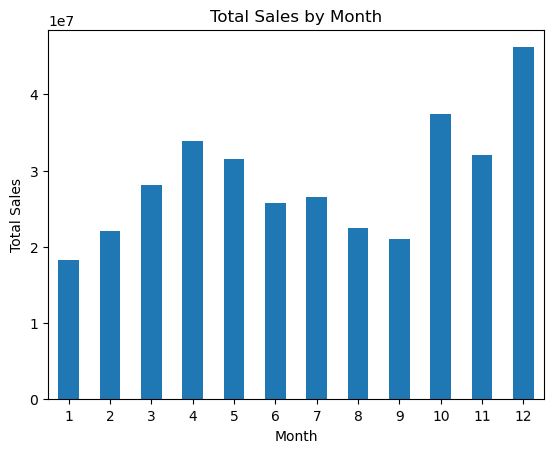

In [152]:
import matplotlib.pyplot as plt

# Plot the 'sales_by_month' Series directly
sales_by_month.plot(kind='bar', x='Month', y='Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(rotation=1)
plt.show()


### What city had the highest number of sales

In [153]:
sales_by_city = all_data.groupby('City').sum(numeric_only=True)['Sales']
sales_by_city_sorted = sales_by_city.sort_values(ascending=False)
print(sales_by_city_sorted)

City
 San Francisco CA     82622039.1
 Los Angeles CA       54525708.0
 New York City NY     46643174.3
 Boston MA            36616420.1
 Atlanta GA           27954985.8
 Dallas TX            27679754.0
 Seattle WA           27477554.8
 Portland OR          18707323.4
 Austin TX            18195817.5
 Portland ME           4497582.7
Name: Sales, dtype: float64


### Vizualize the sales per city 

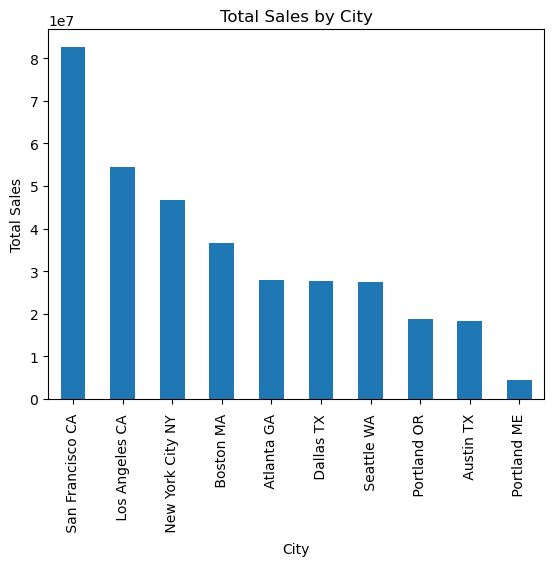

In [154]:
import matplotlib.pyplot as plt

# Create a bar plot using the 'sales_by_city_sorted' Series
sales_by_city_sorted.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales by City')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



### What time should we display advertisements to maximize the likelihood of customer buying the product ?

#### Creating hour and minute columns

In [155]:
all_data['Order Date'] = pd.to_datetime (all_data['Order Date'])
all_data['Hours'] = all_data['Order Date'].dt.hour
all_data['Minutes'] = all_data['Order Date'].dt.minute

#### Creating a vizualization to present the best time to advertize the product

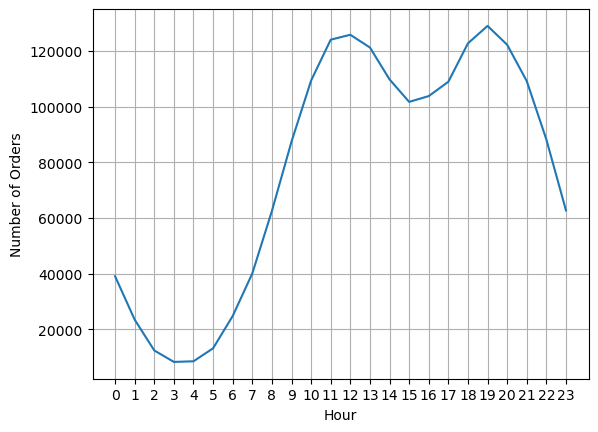

In [156]:
hours = [ hour for hour, df in all_data.groupby('Hours')]

plt.plot (hours, all_data.groupby('Hours')['Quantity Ordered'].count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


### What products sold the most ? Why do you think they sold the most ?

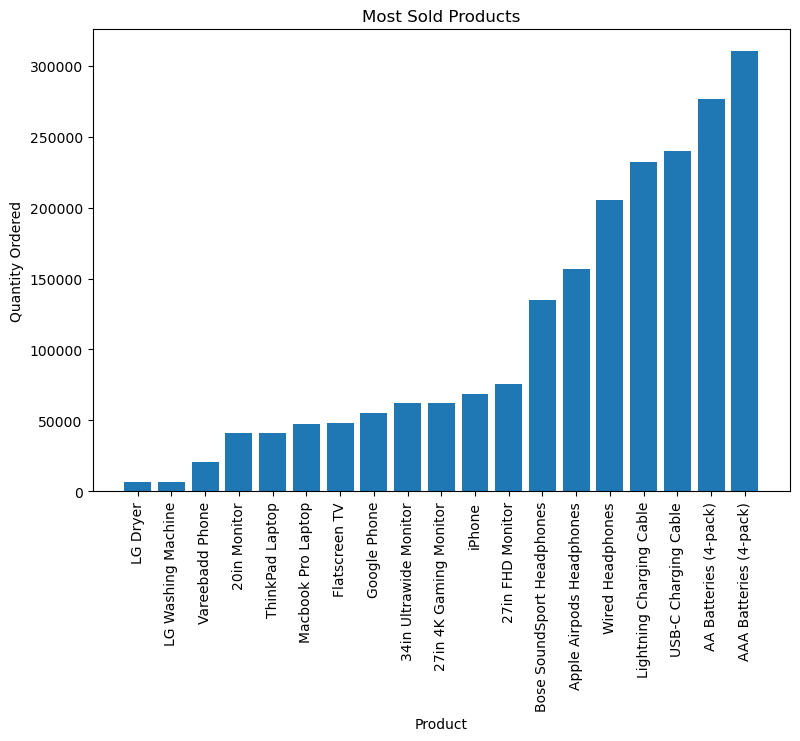

In [183]:
most_sold_product = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
most_sold_product_sorted = most_sold_product.sort_values(by='Quantity Ordered', ascending=True)

plt.figure(figsize=(9, 6))  # Adjust the figure size for better readability

plt.bar(most_sold_product_sorted['Product'], most_sold_product_sorted['Quantity Ordered'])
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Most Sold Products')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()
